# Escuela de Física del Tecnológico de Costa Rica
# IF4702 - Física Computacional I
# Tarea 06
## Estudiante: Andrey Novoa O´connor
## Carnet: 2018144970
## Profesores:
## Jóse Esteban Pérez / Álvaro Amador

# Parte 1.1

Digite la configuración inicial que desea, 1 para espines hacia arriba, 2 para espines hacia abajo, para 3 espines aleatorios: 3


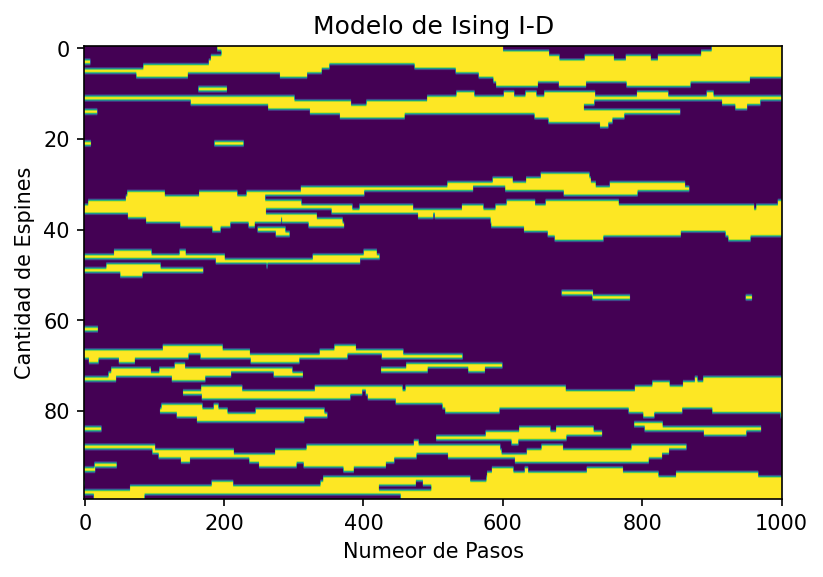

In [7]:
"Se importan las librerías con las que se va a trabajar"
import numpy as np
import matplotlib.pyplot as plt

#-----------------------------------------------------Parámetros------------------------------------------------------#

"Se definen los parámetros para el modelo"
nEspines = 100                            # cantidad de espines
Tkb = 1                                   # producto de la temperatura con la constante de boltzmann
J = 1                                     # energia de intercambio
#arregloEspines = np.zeros([0])            # arreglo donde se van alamacenar los espines
nPasos = 1000                             # numeros de pasos 
energias_eq = 0                           # Varaible para almacenar la energia en equilibrio
magnetizacion_eq = 0                      # Variable para alamcenar la magnetización en equilibrio

listaGrafico=[]                           # Lista donde se vana a guardar los valores a graficar

#--------------------------------------------------funciones----------------------------------------------------------#


"Se crea una función orientador_espines que va a ir asignando la orientación de los espines de manera aletoria"
def orientador_espines(nEspines):
    #se genera la orientación del espin aletoriamente
    espines = np.random.randint(-1,1,nEspines)
    for i in range(nEspines):
        if espines[i] == 0:
            if np.random.random() > 0.5:
                espines[i] = 1
            else:
                espines[i] = -1
    return espines


"Se define la función energía que se generador_energia de calcular la energía para cada espin"
def generador_energia(arregloEspines, J):
    e = 0
    for i in range (len(arregloEspines)-1):
        e += arregloEspines[i]*arregloEspines[i+1]
    return -J*e


"Ahora se define la función de generador_magnetizacion que calcula la magentización para cada configuración de espines"
def generador_magnetizacion(arregloEspines):
    M = 0
    for i in arregloEspines:
        M += i
    return M






"La función cambio de espines cambia el estado de los espines y al mismo tiempo calcula la energía y la magentización"
"para cada estado y los alamacena en un solo arreglo para cada uno"
def cambio_espines(listaGrafico, arregloEspines,energiaT,magnetizacionT,Tkb):
    energias_eq = 0
    magnetizacion_eq = 0
    
    for j in range(nPasos):
        #Energía del estado 1
        energia1 = generador_energia(arregloEspines, J)
        
        #Se define el espin que se va a cambiar de estado
        espin1 = np.random.randint(nEspines)
        
        #Se efectua el cambio del espin anterior
        arregloEspines[espin1]*=-1
        
        #Energia del estado 2
        energia2 = generador_energia(arregloEspines,J)
        
        #Se calcula el delta E
        deltaE= energia2 - energia1
        
        #Se calcula la probabilidad de aceptación
        aceptacion = np.exp(-deltaE/(Tkb))
        
        #se evalua la aceptación
        if deltaE > 0:
            if np.random.random() < aceptacion:
                pass
            else:
                arregloEspines[espin1]*=-1
        else:
            pass
        
        listaGrafico.append(np.array(arregloEspines))
        
        #energia para cada configuración
        energiaT.append(generador_energia(arregloEspines,J))
        
        #magnetización para cada configuración
        magnetizacionT.append(generador_magnetizacion(arregloEspines))


    #Posible valor para alcanzar equilibrio
    equilibrio = 500
    
    #Se calcula la energia y magnetización para el estado posterior al equilibrio
    for i in range(equilibrio,len(energiaT)):
        energias_eq += energiaT[i-1]
        magnetizacion_eq += magnetizacionT[i-1]
        
        #Se promedia el valor de energía y magnetización en el equilibrio
        prom_energia_eq = energias_eq/(len(energia-energiaT)-equilibrio)
        prom_magnetizacion_eq = magnetizacion_eq/(len(magnetizacionT)-equilibrio)
        
    return listaGrafico, prom_energia_eq, prom_magnetizacion_eq,energiaT,magnetizacionT

#------------------------------------------Menú de selección de estado------------------------------------------------------#

"Se define un menú que le permite al usuario elegir el estado de espines que desea que se ejecute la simulación"
while True:
    try:
        configuracion_usada=int(input("Digite la configuración inicial que desea, 1 para espines hacia arriba, 2 para espines hacia abajo, para 3 espines aleatorios: "))
        if configuracion_usada == 1 or configuracion_usada == 2 or configuracion_usada==3:
            break
        else:
            print("Debe indicar un numero entre 1,2 o 3")
    except:
        print("No puede digitar un número diferente a 1,2 o 3, intente de nuevo por favor")
#Se establece la configuración inicial según el valor que el usuario digitó   
if configuracion_usada == 1:
    #Arreglo de espines hacia arriba, configuración 1
    arregloEspines=np.ones([nEspines],np.int)
elif configuracion_usada == 2:
    #Arreglo de espines hacia abajo , configuración 2
    arregloEspines=np.ones([nEspines],np.int)*-1
elif configuracion_usada == 3:
    #Arreglo de espines aleatorios, configuración 3
    arregloEspines = orientador_espines(nEspines)


#----------------------------------------Llamado de las funciones---------------------------------------------------------#
    
    
energia = generador_energia(arregloEspines,J)
listaGrafico.append(np.array(arregloEspines))
energiaT = [generador_energia(arregloEspines,J)]
magnetizacionT = [generador_magnetizacion(arregloEspines)]
listaGrafico,prom_energia_eq,prom_magnetizacion_eq,energia_iterada,magnetizacion_iterada=cambio_espines(listaGrafico,arregloEspines, energiaT, magnetizacionT, Tkb)
arregloGrafico = np.asarray(listaGrafico)


#----------------------------------------------------Gráficas-------------------------------------------------------------#


fig = plt.figure(dpi=150)
plt.imshow(arregloGrafico.T,aspect = 'auto')
plt.title("Modelo de Ising I-D")
plt.xlabel("Numeor de Pasos")
plt.ylabel("Cantidad de Espines")
plt.show()


# Parte 1.2

Digite la configuración inicial que desea, 1 para espines hacia arriba, 2 para espines hacia abajo, para 3 espines aleatorios: 3


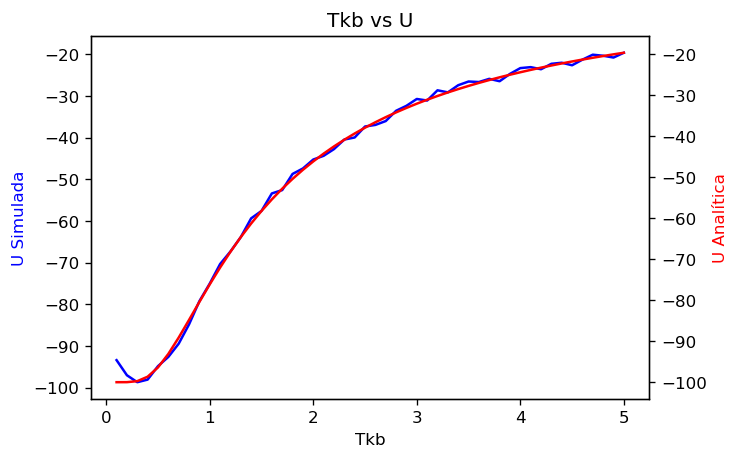

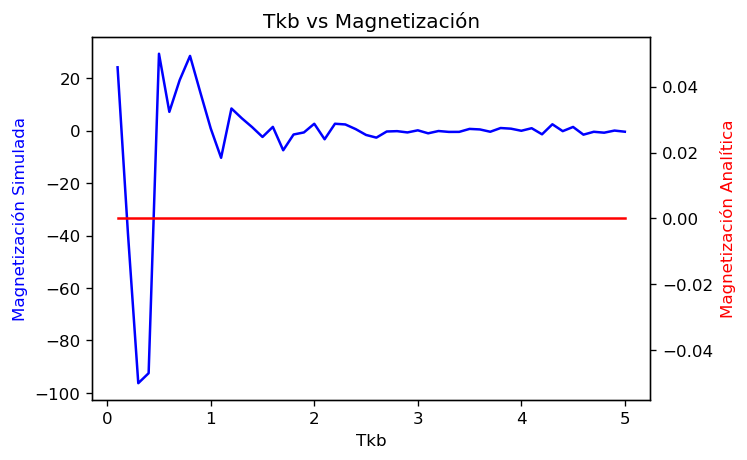

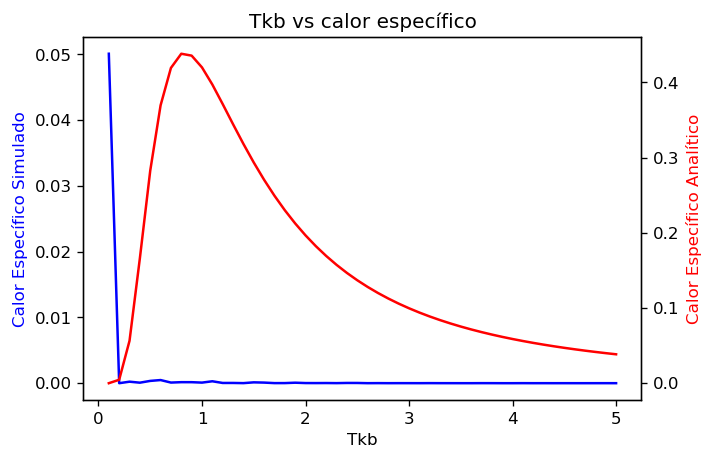

In [11]:
"Se importan las librerías con las que se va a trabajar"
import numpy as np
import matplotlib.pyplot as plt


#-----------------------------------------------------Parámetros------------------------------------------------------#

nSimulaciones=20                            # cantidad de simulaciones a iterar
nEspines=100                                # cantidad de espines
nPasos = 3000                               # cantidad de pasos para la simulacion
Tkb=1                                       # producto de la temperatura con la constante de boltzmann (fijo)
Tkb_variable=0.1                            # producto de la temperatura con la constante de boltzmann (que va ir variando)
J=1                                         # energia de intercambio
U=0                                         # variable donde se van alamacenar los valores de energia interna
energias_eq=0                               # Varaible para almacenar la energia en equilibrio
magnetizacion_eq=0                          # Variable para alamcenar la magnetización en equilibrio
energias_internas_iterada=0                 # Variable donde se van a almacenar las energia internas en cada iteracion
prom_energia=0                              # Variable donde se va a almacenar la energia promedio
prom_magnetizacion=0                        # Variable donde se va a almacenar la magnetizacion promedio

#Listas que se van a utilizar en la simulación
listaGrafico_iterado=[]
energia_iterada=[]
magnetizacion_iterada=[]
Tkb_grafico=[] 
energia_interna_grafico=[]
magnetizacion_variable_grafico=[]
U_iterado=[]
calor_especifico=[]
energia_iterada=[]
magnetizacion_iterada=[]



#--------------------------------------------------funciones----------------------------------------------------------#


"Se crea una función orientador_espines que va a ir asignando la orientación de los espines de manera aletoria"
def orientador_espines(nEspines):
    espines=np.random.randint(-1,1,size=nEspines)
    for i in range(nEspines):
        if espines[i]==0:
            if np.random.random()>0.5:
                espines[i]=1
            else:
                espines[i]=-1
    return espines


"Se define la función energía que se generador_energia de calcular la energía para cada espin"
def generador_energia(arreglo, J):
    valorEnergia=0
    for i in range (len(arreglo)-1):
        valorEnergia+=arreglo[i]*arreglo[i+1]
    return -J*valorEnergia


"Ahora se define la función de generador_magnetizacion que calcula la magentización para cada configuración de espines"
def generador_magnetizacion(arreglo_Espines):
    magnetico=0
    for i in arreglo_Espines:
        magnetico+=i
    return magnetico



"La función cambio de espines cambia el estado de los espines y al mismo tiempo calcula la energía y la magentización"
"para cada estado y los alamacena en un solo arreglo para cada uno"
def cambio_espines(listaGrafico, arregloEspines ,energiaT, magnetizacionT, Tkb):
    energias_eq = 0
    magnetizacion_eq = 0
    
    for j in range(nPasos):
        
        #Energía del estado 1
        energia1=generador_energia(arregloEspines,J)
        
        #Se define el espin que se va a cambiar de estado
        espin1=np.random.randint(nEspines)
        
        #Se efectua el cambio del espin anterior
        arregloEspines[espin1]*=-1
        
        #Energia del estado 2
        energia2=generador_energia(arregloEspines,J)
        
        #Se calcula el delta E
        deltaE=energia2-energia1
        
        #Se calcula la probabilidad de aceptación
        aceptacion=np.exp(-deltaE/(Tkb))
        
        #se evalua la aceptación
        if deltaE>0:
            if np.random.random()<aceptacion:
                pass 
            else:
                arregloEspines[espin1]*=-1 
        else:
            pass
        listaGrafico.append(np.array(arregloEspines))
        
        #energia para cada configuración
        energiaT.append(generador_energia(arregloEspines,J))
        
        #magnetizacion para cada configuración
        magnetizacionT.append(generador_magnetizacion(arregloEspines))
        
    #Posible valor para alcanzar equilibrio
    equilibrio=2000
    
    #Se calcula la energia y magnetización para el estado posterior al equilibrio
    for i in range(equilibrio,len(energiaT)):
        energias_eq+=energiaT[i-1]
        magnetizacion_eq+=magnetizacionT[i-1]
        

    #Se promedia el valor de energía y magnetización en el equilibrio
    energias_eq_prom = energias_eq/(len(energiaT)-2000)
    magnetizacion_eq_prom = magnetizacion_eq/(len(magnetizacionT)-2000)

    return listaGrafico,energias_eq_prom,magnetizacion_eq_prom,energiaT,magnetizacionT


"Se define la función iterar que será la encargada de realizar las nSimulaciones con el objetivo de disminuir las flutuaciones estadisticas"
def iterar(listaGrafico,espines_iniciales, listaGrafico_iterado, energia_iterada, magnetizacion_iterada,nSimulaciones,Tkb,prom_energia,prom_magnetizacion, U):
    energia_iterada_acum=[]
    magnetizacion_iterada_acum=[]

    for h in range(0,nSimulaciones):
        llamada_funcion=cambio_espines(listaGrafico, espines_iniciales, energia_iterada, magnetizacion_iterada, Tkb)
        listaGrafico_iterado.append(llamada_funcion[0])
        energia_iterada_acum.append(llamada_funcion[1])
        magnetizacion_iterada_acum.append(llamada_funcion[2])
 
    for i in energia_iterada_acum:
        prom_energia+=i
    for i in magnetizacion_iterada_acum:
        prom_magnetizacion+=i
    for i in energia_iterada_acum:
        U+=(i)**2

    prom_energia_final=prom_energia/nSimulaciones
    prom_magnetizacion_final=prom_magnetizacion/nSimulaciones
    U_final=(1/nSimulaciones)*U
    return listaGrafico_iterado, energia_iterada_acum, magnetizacion_iterada_acum,prom_energia_final,prom_magnetizacion_final,U_final


#------------------------------------------Menú de selección de estado------------------------------------------------------#

while True:
    try:
        configuracion_usada=int(input("Digite la configuración inicial que desea, 1 para espines hacia arriba, 2 para espines hacia abajo, para 3 espines aleatorios: "))
        if configuracion_usada == 1 or configuracion_usada == 2 or configuracion_usada==3:
            break
        else:
            print("Debe indicar un numero entre 1,2 o 3")
    except:
        print("No puede digitar un número diferente a 1,2 o 3, intente de nuevo por favor")
#Se establece la configuración inicial según el valor que el usuario digitó   
if configuracion_usada==1:
    #Arreglo de espines hacia arriba, configuración 1
    arregloEspines=np.ones([nEspines],np.int)
elif configuracion_usada==2:
    #Arreglo de espines hacia abajo , configuración 2
    arregloEspines=np.ones([nEspines],np.int)*-1
elif configuracion_usada==3:
    #Arreglo de espines aleatorios, configuración 3
    arregloEspines=orientador_espines(nEspines)

    
#------------------------------------------Llamado de las funciones---------------------------------------------------------#
    
energia=generador_energia(arregloEspines,J)
listaGrafico_iterado, energia_iterada, magnetizacion_iterada,prom_energia,prom_magnetizacion,U=iterar(listaGrafico,arregloEspines, listaGrafico_iterado, energia_iterada, magnetizacion_iterada,nSimulaciones,Tkb,prom_energia,prom_magnetizacion,U)





#----------------------------------------Calculo de la energía interna y calor específico---------------------------------------------------

while Tkb_variable<=5:
    U=0
    energia_iterada=[]
    magnetizacion_iterada=[]
    prom_energia=0
    prom_magnetizacion=0
    u0=0
    U_iterado=0
    asignacion_funcion=iterar(listaGrafico,arregloEspines, [], energia_iterada, magnetizacion_iterada,nSimulaciones,Tkb_variable,prom_energia,prom_magnetizacion,U)
    u0=asignacion_funcion[3]
    energia_interna_grafico.append(u0)
    Tkb_grafico.append(Tkb_variable)
    magnetizacion_variable_grafico.append(asignacion_funcion[4])
    U_iterado=asignacion_funcion[5]
    calor_especifico.append((1/(nEspines**2))*((U_iterado-u0**2)/(Tkb_variable**2)))
    Tkb_variable+=0.1



#--------------------------------------Calculo de la solución análitica con los datos del libro-----------------------------#  

B=0
analitica_u=[]
analitica_magnetizacion=[]
analitica_calor_especifico=[]
for i in Tkb_grafico:
    analitica_u.append(-nEspines*((np.exp(J/i)-np.exp(-J/i))/(np.exp(J/i)+np.exp(-J/i))))
    analitica_magnetizacion.append((nEspines*np.exp(J/i)*np.sinh(B/i))/(np.sqrt(np.exp(2*J/i)*(np.sinh(B/i)**2)+np.exp(-2*J/i))))    
    analitica_calor_especifico.append(((J/i)**2)/((np.cosh(J/i))**2)) 
    

#----------------------------------------------------Gráficas-------------------------------------------------------------# 
    
"Se grafica la constante de boltzmann con respecto a la energía interna"
fig,ax=plt.subplots(dpi=120)
ax.plot(Tkb_grafico,energia_interna_grafico,"b")
ax2=ax.twinx()
ax2.plot(Tkb_grafico,analitica_u, "r")
ax.set_title("Tkb vs U")
ax.set_xlabel("Tkb")
ax.set_ylabel("U Simulada",color="b")
ax2.set_ylabel("U Analítica",color="r")
plt.show()

"Se grafica la constante de boltzmann con respecto a la magnetización"
fig,ax=plt.subplots(dpi=120)
ax.plot(Tkb_grafico, magnetizacion_variable_grafico,color="b")
ax2=ax.twinx()
ax2.plot(Tkb_grafico,analitica_magnetizacion, color="r")
ax.set_title('Tkb vs Magnetización')
ax.set_xlabel('Tkb')
ax.set_ylabel('Magnetización Simulada',color="b")
ax2.set_ylabel('Magnetización Analítica',color="r")
plt.show()

"Se grafica la constante de boltzmann con respecto al calor específico"
fig,ax=plt.subplots(dpi=120)
ax.plot(Tkb_grafico, calor_especifico,"b")
ax2=ax.twinx()
ax2.plot(Tkb_grafico,analitica_calor_especifico, "r")
ax.set_title('Tkb vs calor específico')
ax.set_xlabel('Tkb')
ax.set_ylabel('Calor Específico Simulado',color="b")
ax2.set_ylabel('Calor Específico Analítico',color="r")
plt.show()